<a href="https://colab.research.google.com/github/Pengs555/Digital-Signal-Processing/blob/main/Jobsheet_1_PSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oleh  : Faiq Mananul Faqih / 5312422006**

**Filter and Windows**

<ipython-input-6-470337280296>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(-4, L+4, step = 1), h, use_line_collection = True)


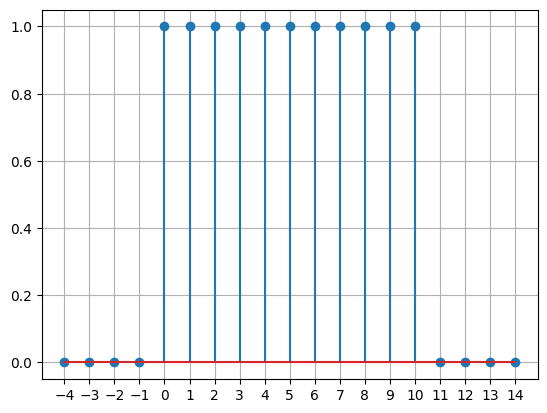

In [6]:
import numpy as np
import matplotlib.pyplot as plt

L = 11
h = np.concatenate((np.zeros(4), np.ones(L), np.zeros(4)), axis = 0)
plt.figure()
plt.stem(np.arange(-4, L+4, step = 1), h, use_line_collection = True)
plt.xticks(np.arange(-4, L+4, step = 1))
plt.grid()

Di atas adalah bentuk sinyal yang akan digunakan untuk melakukan tes bagaimana impulse response terhadap sistem.

interactive(children=(IntSlider(value=18, description='L', max=128, min=2), Checkbox(value=False, description=…

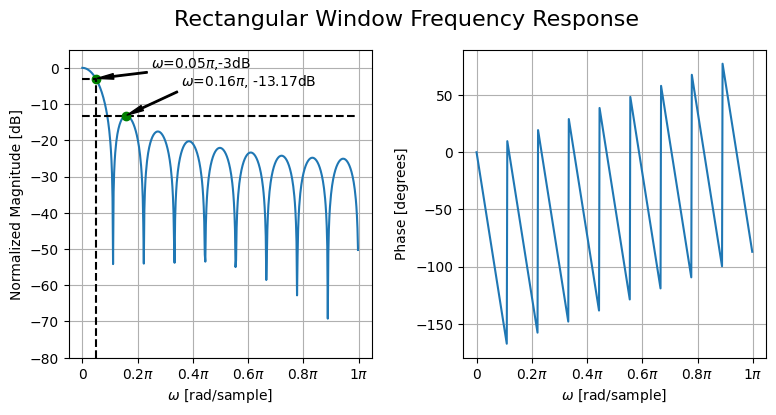

In [14]:
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import argrelextrema
import scipy.signal as signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Rectangular Window Frequency Response', fontsize=16)
plt.subplots_adjust(wspace=0.3)

@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=18),unwrap=False)
def plot_recWindow_H(L=16, unwrap=False):
    h = np.concatenate((np.ones(L),np.zeros(4)),axis=0)
    omega, H =signal.freqz(h[:-4],worN=512)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H)/np.abs(H).max())
    p3dB=np.max(H_dB)-3
    p3dBIndex= np.max(np.where(H_dB >= p3dB))
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    ax1.clear()
    ax1.plot(omega, H_dB)
    ax1.plot(wp, Hp,'go')
    ax1.plot((0, wp), (Hp, Hp), 'k--')
    ax1.plot((wp, wp), (-80, Hp), 'k--')
    ax1.set_ylim((-80,H_dB.max()+5))
    ax1.annotate(r'$\omega$={:.2f}$\pi$,-3dB'.format(wp/np.pi), xy=(wp, Hp), xytext=(wp+0.2*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H), np.greater)[0][0]
        ax1.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--')
        ax1.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(omega[side_lobe]+0.2*np.pi, -5),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax1.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax1.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax1.grid(True)
    ax1.set_xlabel(r'$\omega$ [rad/sample]')
    ax1.set_ylabel(r'Normalized Magnitude [dB]')


    ax2.clear()
    phase=np.angle(H,deg=True)
    if unwrap:
        phase=np.unwrap(phase)
    ax2.plot(omega,phase)
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax2.grid(True)
    ax2.set_xlabel(r'$\omega$ [rad/sample]')
    ax2.set_ylabel(r'Phase [degrees]')

Kode di atas yakni membahas mengenai response frekuensi dari jendela persegi Panjang (Rectangular window). Tujuannya untuk memberikan visualisasi intuitif dan interaktif tentang bagaimana perubahan Panjang jendela persegi (rectangular window) mempengaruhi karakteristik frekuensi dari window tersebut.
* Fungsi 'plot_recWindow_H' dipanggil setiap kali pengguna mengubah parameter
melalui widget slider 'L' atau checkbox 'unwrap'. L adalah Panjang jendela persegi.
* Proses komputasinya menggunakan fungsi 'signal.freqz' untuk menghitung respons frekuensi 'H'. Menghitung dan menandai frekuensi dimana magnitude turun 3dB dari puncaknya.
* Visualisasi magnitude digambarkan sebagai fungsi dari frekuensi radian per sampel. Tanda dan garis putus-putus digunakan untuk menandai poin-poin penting seperti -db dan side lobes.
* Visualisasi fase ditampilkan dalam derajat. Fungsi 'unwrapped' digunakan untuk mendapatkan perspektif yang lebih jelas ada perubahan fase sebenarnya.

**Approximation of an Ideal Low Pass Filter using a Rectangular Window and Delay**

In [8]:
from sympy import sin, symbols, simplify, pi, lambdify, limit

wc_s = symbols('\omega_c')
n_s, L_s = symbols('n L', integer = True)

n_d_s = (L_s-1)/2
h_n_s = sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s))
h_n_s

sin(\omega_c*(-L/2 + n + 1/2))/(pi*(-L/2 + n + 1/2))

Formula untuk filter low-pass ideal dalam domain Waktu yang bertujuan untuk melihat response impulse dari Ideal Low-Pass Filter.

In [9]:
h_0_s = limit(h_n_s,n_s,n_d_s)
h_0_s

\omega_c/pi

Formula untuk menghitung nilai dari respons impuls h(n) pada titik tengah n_d. Fungsi limit digunakan untuk menghitung batas dari suatu ekspresi saat variabel mendekati nilai tertentu. Tujuannya untuk menangani kondisi Ketika penyebut nol, sehingga melalui penerapan deret Taylor Ketika kondisi sin (x) untuk x=0 akan memiliki nilai 1.

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), FloatSlider(value=0.5, description…

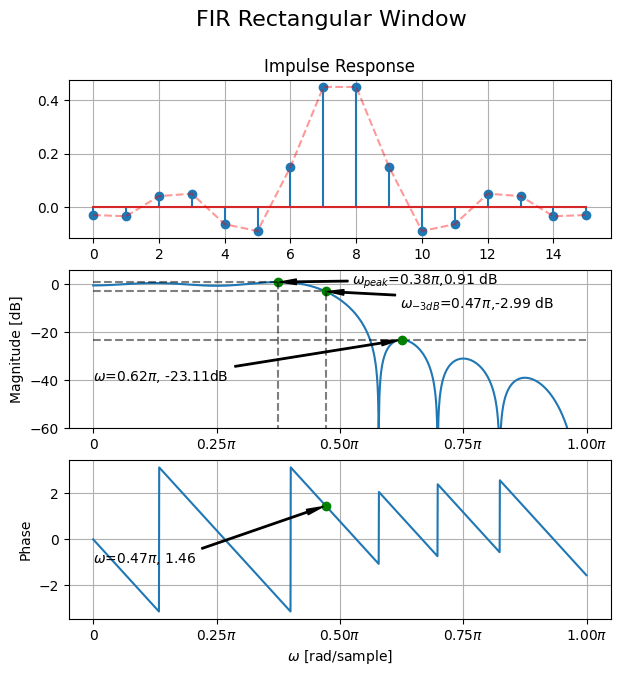

In [10]:
h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy')

fig1, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(7,7))
fig1.suptitle('FIR Rectangular Window', fontsize=16)
plt.subplots_adjust(wspace=0.3)


@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),
          wc=widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5), unwrap=False)
def plot_h(L=16, wc=0.5,unwrap=False):
    wc=wc*np.pi
    n=np.arange(L)
    n_d=n_d_s.subs(L_s,L).evalf()
    if L%2==0:
        h=h_n(wc,n,L)
    else:
        h=np.ones(L)
        for i in range(L):
            if i==n_d:
                h[i]=wc/np.pi
            else:
                h[i]=h_n(wc,i,L)
    ax1.clear()
    ax1.stem(h, use_line_collection=True)
    ax1.plot(h,'r--',alpha=0.4)
    ax1.set_title(r'Impulse Response')
    ax1.grid()

    omega, H =signal.freqz(h,worN=2048)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H))
    p3dB=-3
    p3dBIndex_down= np.max(np.where(H_dB >= p3dB))
    p3dBIndex_up= np.min(np.where(H_dB <= p3dB))
    print(H_dB[p3dBIndex_down])
    print(H_dB[p3dBIndex_up])
    if (np.abs(p3dB-H_dB[p3dBIndex_down]) >= np.abs(p3dB-H_dB[p3dBIndex_up])):
        p3dBIndex=p3dBIndex_up
    else:
        p3dBIndex=p3dBIndex_down
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    max_peak_ind=np.argmax(H_dB)

    ax2.clear()
    ax2.plot(omega, H_dB)
    ax2.plot(omega[max_peak_ind], H_dB[max_peak_ind],'go')
    ax2.plot((0, omega[max_peak_ind]), (H_dB[max_peak_ind], H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.plot((omega[max_peak_ind], omega[max_peak_ind]), (-80, H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.annotate('$\omega_{{peak}}$={:.2f}$\pi$,{:.2f} dB'.format(omega[max_peak_ind]/np.pi,H_dB[max_peak_ind]),
                 xy=(omega[max_peak_ind],H_dB[max_peak_ind]), xytext=(omega[max_peak_ind]+0.15*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4))
    ax2.plot(wp, Hp,'go')
    ax2.plot((0, wp), (Hp, Hp), 'k--', alpha=0.5)
    ax2.plot((wp, wp), (-80, Hp), 'k--',alpha=0.5)
    ax2.set_ylabel(r'Magnitude [dB]')
    ax2.grid()
    ax2.set_ylim((-60,H.max()+5))
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax2.annotate(r'$\omega_{{-3dB}}$={:.2f}$\pi$,{:.2f} dB'.format(wp/np.pi,Hp), xy=(wp, Hp), xytext=(wp+0.15*np.pi, -10),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H[p3dBIndex:]), np.greater)[0][0]+p3dBIndex
        ax2.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--',alpha=0.5)
        ax2.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(0, -40),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax2.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax3.clear()
    phase=np.angle(H, deg=False)
    if unwrap:
        phase=np.unwrap(phase)
        print('Delay={:.2f}'.format(phase[p3dBIndex]/wp))
    ax3.plot(omega,phase)
    ax3.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax3.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax3.grid(True)
    ax3.set_xlabel(r'$\omega$ [rad/sample]')
    ax3.set_ylabel(r'Phase')
    ax3.plot(wp, phase[p3dBIndex],'go')
    ax3.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}'.format(wp/np.pi,phase[p3dBIndex]),
                     xy=(wp, phase[p3dBIndex]), xytext=(0, -1),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)

Kode di atas membahas visualisasi dan analisis mengenai karakteristik dari Finite Impulse response (FIR) filter dengan jendela persegi Panjang (Rectangular window).
* Fungsi "lambdify" digunakan untuk mengubah "h_n_s" menjadi fungsi yang dapat dioperasikan dengan array NumPy, sehingga apabila parameter berubah dapat dievaluasi lebih cepat dan efisien.
* Nilai dari impulse response filter dihitung menggunakan fungsi "h_n" yang sudah di lambdify.
* Menggunakan "signal.freqz" untuk menghitung response frekuensi filter dari koefisien yang dihasilkan.
* Menghitung dan plot fase dari respons frekuensi. Opsi "unwrap" fase untuk visualisasi yang lebih jelas dari karakteristik fase.
* Penentuan -3 dB menunjukkan frekuensi di mana output filter turun 3 dB dari puncaknya. Ini dianggap sebagai batas dari bandwidth filter. Pada kode mencari dua poin terdekat dengan -3 dB dan memilih yang terdekat dengan nilai -3 dB sesungguhnya.
* Puncak respons frekuensi dan side lobes (jika ada) ditandai dan dianotasi. Puncak menunjukkan frekuensi resonansi filter, sementara side lobes menunjukkan kebocoran frekuensi atau efek riak yang tidak diinginkan.
* Frekuensi puncak dan -3 dB ditandai untuk memberikan pemahaman visual yang jelas tentang karakteristik filter tersebut.

Berdasarkan output kode dapat disimpulkan, bahwa impulse response untuk mengetahui bagaimana koefisien filter berubah dengan Panjang filter dan frekuensi cut off. Response frekuensi (magnitude dan phase) diketahui bahwa amplitudo dan fase filter berubah, dan bentuk respon dari berbagai frekuensi dari 0 hingga phi rad/sample.